<font color="#002856"><h1 align="left">Algoritmos de optimización - RETOS</h1></font>

#### Profesor: Juan Francisco Vallalta Rueda 
#### Alumno: Luis Angel Motta Valero<b>


URL: https://drive.google.com/file/d/1JQUDARQqpeYB2pYzMq2OGVNVipJq25Gr/view?usp=sharing<br>
GitHub: [03MAIR-Algoritmos-de-Optimizacion](https://github.com/AngelMV97/03MAIR-Algoritmos-de-Optimizacion.git)

---

In [1]:
# Importe de las librerías necesarias
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import math

# Reto VC-1

## Implementa el algoritmo de la Criba de Erastótenes para encontrar número primos. Encuentra los números primos entre los 10.000 primeros números naturales

In [ ]:
# Criba de Erastótenes
def primos(n):
    if n < 2: return [] # Un valor n inferior al primer número primo retorna una lista vacía
    # Crear una lista desde 2 hasta n (inclusive)
    lista = list(range(2,n+1))
    for i in range(2,int(math.sqrt(n))): # Para i desde 2 hasta int(raíz cuadrada de n)
        for j in lista: # Por cada j en la lista
            if j != i:
                if j%i == 0: # "Marcar" i x j (si j es múltiplo de i)
                    lista.remove(j) # Remover de la lista los marcados
    return lista

In [ ]:
# Alternativa a la Criba de Eratostenes

# Función que retorna si un número es primo
def es_primo(n):
    if n < 2: return False # Si n es menor que 2, se sabe que no es un número primo
    for i in range(2, n//2+1):
        if n % i == 0:
            return False
    return True

# Función que guarda los números primos en una lista
def list_primos(n):
    n_primos = [i for i in range(n+1) if es_primo(i)]

    return n_primos

In [ ]:
# Medición del tiempo de ejecución del algoritmo
print('Criba de Erastótenes')
for _ in range(10):
    inicio = time.time()
    list_primos(10000)
    fin = time.time()
    print('Tiempo de ejecición:',fin-inicio)
print()
print('Alternativa evaluando primo')
for _ in range(10):
    inicio = time.time()
    primos(10000)
    fin = time.time()
    print('Tiempo de ejecición:',fin-inicio)


Criba de Erastótenes
Tiempo de ejecición: 0.4915482997894287
Tiempo de ejecición: 0.474285364151001
Tiempo de ejecición: 0.45723438262939453
Tiempo de ejecición: 0.4561300277709961
Tiempo de ejecición: 0.4354994297027588
Tiempo de ejecición: 0.34960508346557617
Tiempo de ejecición: 0.22472214698791504
Tiempo de ejecición: 0.24304580688476562
Tiempo de ejecición: 0.2239246368408203
Tiempo de ejecición: 0.22642827033996582

Alternativa evaluando primo
Tiempo de ejecición: 0.26738977432250977
Tiempo de ejecición: 0.28812623023986816
Tiempo de ejecición: 0.26549649238586426
Tiempo de ejecición: 0.2678866386413574
Tiempo de ejecición: 0.2704942226409912
Tiempo de ejecición: 0.27989792823791504
Tiempo de ejecición: 0.2658560276031494
Tiempo de ejecición: 0.2642223834991455
Tiempo de ejecición: 0.2636871337890625
Tiempo de ejecición: 0.27879810333251953


# Retos VC-2

## Implementa una solución al problema de las 8 reinas en un tablero 8x8

In [2]:
def diagonales_disponibles(pos_col, fila, diagonales_ocupadas):
    ocupadas_positivas = []
    ocupadas_negativas = []
    disponibles = []
    for diagonal in diagonales_ocupadas:
        ocupadas_positivas.append(diagonal[0])
        ocupadas_negativas.append(diagonal[1])
    for posicion in pos_col:
        if (fila+posicion not in ocupadas_positivas) and (fila-posicion not in ocupadas_negativas) :
            disponibles.append(posicion)
    return disponibles

def conflicto_reinas(tablero, pos_col, fila, reina, diagonales_ocupadas):
    # i = 0
    #
    posiciones_posibles = diagonales_disponibles(pos_col, fila, diagonales_ocupadas)
    if len(posiciones_posibles) == 0: return tablero, diagonales_ocupadas, reina
    else:
        while reina not in posiciones_posibles:
            reina = random.choice(posiciones_posibles)
        tablero[fila,reina] = 1
        posicion_reina = (fila+reina, fila-reina) # (diagonal_positiva, diagonal_negativa)
        diagonales_ocupadas.append(posicion_reina)
    return tablero, diagonales_ocupadas, reina

def n_reinas(n):
    if 1 < n < 4: raise "No existe solución para 2 y 3 reinas"
    if n < 1: raise "Valor no válido"
    if n == 1: return np.array([1])
    tablero = np.zeros((n,n), dtype=int) # Se parte con una matriz de ceros (todo el tablero sin reinas)
    pos_col = list(range(n)) # Posiciones disponibles por cada columna
    fila = 0
    diagonales_ocupadas = []
    while len(pos_col) > 0:
        reina = random.choice(pos_col) # Se escoge la posición de una reina por cada fila
        # pos_col_copy = pos_col.copy()
        tablero, diagonales_ocupadas, reina = conflicto_reinas(tablero, pos_col, fila, reina, diagonales_ocupadas) # func hace intercambio y revisa las diagonales
        if len(diagonales_ocupadas) > fila:
            pos_col.remove(reina) # Se elimina esa posición para que no hayan más de una reina por cada columna
            fila += 1
        else:
            tablero = n_reinas(n)
            break
    return tablero

In [3]:
n_reinas(8)

array([[0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0]])

In [ ]:
# Medición del tiempo de ejecución del algoritmo
for _ in range(10):
    inicio = time.time()
    n_reinas(20)
    fin = time.time()
    print('Tiempo de ejecución:',fin-inicio)

Tiempo de ejecución: 0.0008602142333984375
Tiempo de ejecución: 0.011775732040405273
Tiempo de ejecución: 0.007190227508544922
Tiempo de ejecución: 0.001218557357788086
Tiempo de ejecución: 0.0033109188079833984
Tiempo de ejecución: 0.002132892608642578
Tiempo de ejecución: 0.010490894317626953
Tiempo de ejecución: 0.009149789810180664
Tiempo de ejecución: 0.004388570785522461
Tiempo de ejecución: 0.002001523971557617


## Implementa una solución del problema de las Torres de Hanoi para un número arbitrario n de fichas

In [ ]:
# Torres de Hanoy
def mover(n,origen,destino,auxiliar):
    print(f"Para {n} bloques, el mínimo número de movimientos es {2**n-1}")
    # si la cantidad de anillos es impar, la pieza inicial irá a destino y, si es par, al auxiliar.
    if n > 0:
        mover(n,origen,destino,auxiliar)
        destino.append(origen.pop())
        mover(n,origen,destino,auxiliar)
    return origen,destino,auxiliar


In [ ]:
def torres_hanoy(n, origen=1, destino=3):
    if n == 1:
        print(f"Llevar desde {origen} hasta {destino}")
    else:
        torres_hanoy(n-1, origen, 6-origen-destino)
        print(f"Llevar desde {origen} hasta {destino}")
        torres_hanoy(n-1, 6-origen-destino, destino)

torres_hanoy(3,1,3)

Llevar desde 1 hasta 3
Llevar desde 1 hasta 2
Llevar desde 3 hasta 2
Llevar desde 1 hasta 3
Llevar desde 2 hasta 1
Llevar desde 2 hasta 3
Llevar desde 1 hasta 3


# Reto

## Optimización de la función $$\scriptsize f(x)=\sin(\frac{1}{2}x^2 - \frac{1}{4}y^2 + 3) \cdot \cos(2x + 1 - e^y)$$ mediante el algoritmo por descenso del gradiente.

In [ ]:
import sympy as sym
from sympy.plotting import plot, plot3d

x,y = sym.symbols('x y')

In [ ]:
def grad_f(vector):
    h = 0.00001
    grad = np.zeros(len(vector))

    for i in range(len(vector)):
        vec = np.copy(vector)
        vec[i] = vec[i] + h
        derivada = (func(vec) - func(vector)) / h
        grad[i] = derivada
    return grad

def grad_descent(grad,xn,r,tol=1e-12,maxit=1e5):
    i = 0
    maxit = int(maxit)
    xn_i = grad

    # Para funciones de 1 variable
    if len(grad) == 1:
        while (abs(xn_i - xn) > tol) and (i < maxit):
            xn = xn_i
            grad = grad_f(np.array([xn]))
            xn_i = xn -  r * grad
            i += 1

    # Para funciones de múltiples variables
    else:
        while (abs(xn_i[0] - xn[0]) > tol or abs(xn_i[1] - xn[1]) > tol) & (i < maxit):
            xn = xn_i
            grad = grad_f(xn)
            xn_i = xn -  r * grad
            i += 1
    return xn_i, func(xn_i)

In [ ]:
func = lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )
vector = np.random.rand(2)
xn = np.random.rand(2)
grad = grad_f(vector)
grad_descent(grad,xn,r=0.01,tol=1e-12,maxit=1e5)

(array([-0.82293948, -0.4994561 ]), -0.04198326453718155)

# Reto

## Implementar el algoritmo del descenso por gradiente para el problema de la regresión lineal simple.

mse = 0.03781434456422766
w0 = 0.10059346423772286
w1 = 1.8718775546746758


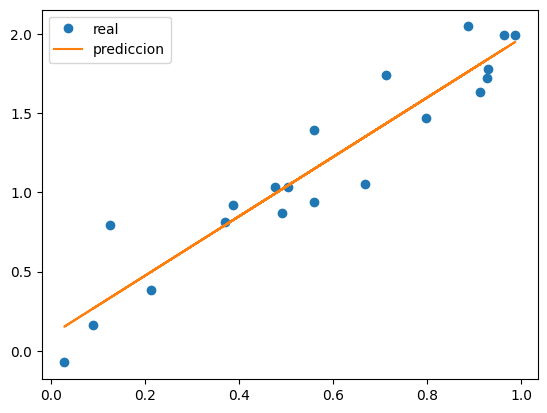

In [ ]:
def MSE(y,y_):
    ''' Cálculo del error cuadrático medio '''
    return np.sum((y - y_)**2)/n

def gradientes(x,y,y_):
    ''' Derivadas parciales respecto a w0 y w1 '''
    D_w0 = -2*np.sum((y-y_))/n
    D_w1 = -2*np.sum(x*(y-y_))/n
    return D_w1, D_w0

def desc_grad(x,y,w0,w1,alpha,steps,tol):
    ''' Implementación del descnso de gradiente sobre la regresión lineal '''
    for _ in range(steps):
        y_ = w0 + w1*x
        mse = MSE(y,y_)
        D_w1, D_w0 = gradientes(x,y,y_)
        w0 = w0 - D_w0*alpha
        w1 = w1 - D_w1*alpha
        if mse < tol: break
    return mse, w0, w1, y_

# Datos del problema
n = 20
x = np.random.uniform(0,1,n)
def f(x): return x*2
noise_variance = 0.2
noise = np.random.randn(x.shape[0])*noise_variance
y = f(x) + noise

# Inicialización de las constantes
w0 = random.random()
w1 = random.random()

mse, w0, w1, y_ = desc_grad(x,y,w0,w1,alpha=0.01,steps=20000, tol = 1e-15)
print(f'''mse = {mse}
w0 = {w0}
w1 = {w1}''')
plt.plot(x,y,'o', label='real')
plt.plot(x,y_, label='prediccion')
plt.legend()
plt.show()